# Megaline audience research

### Table of Contents

* [Preface](#Preface) 
 <p/>  
* [Step 1. General information](#Step-1.-General-information) 
 <p/>        
* [Step 2. Data preprocessing](#Step-2.-Data-preprocessing)         
        
    * [2.1 Missing values and errors](#2.1-Missing-values-and-errors)
    
    * [2.2 Data types conversion](#2.2-Data-types-conversion)
    
    * [2.3 Calls per month](#2.3-Calls-per-month)
    
    * [2.4 Number of text messages sent per month](#2.4-Number-of-text-messages-sent-per-month)
    
    * [2.5 Volume of data per month](#2.5-Volume-of-data-per-month)
    
    * [2.6 Getting tables united](#2.6-Tables-united)
    
    * [2.7 Profit](#2.7-Profit) 
       
 <p/>        
* [Step 3. Analyzing the data](#Step-3.-Analyze-the-data)
 <p/>        

* [Step 4. Test the hypotheses](#Step-4.-Test-the-hypotheses)
<p/> 

* [Conclusions](#Conclusions)


### Preface

I personally would consider this unethical of the Megaline company to provide analysts with the customers data including personal names instead of id numbers only, at least as a customer I wouldn't agree to that, supposing I read the agreement. Marketing is generally a philosophically questionable practice, a science of objectivating humans as a means of obtaining profits, I think it works better when one takes it into account. 

Telecom operator Megaline offers its clients two prepaid plans, Surf and Ultimate. This reserch aims to find out which of the plans is more profitable in order to adjust the advertising budget.
The task is to carry out a preliminary analysis of the plans based on a relatively small client selection, the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Below clients' behavior is being analyzed to determine which prepaid plan is more profitable. 

Condensed some imports here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Step 1. General information

In [2]:
try:
    calls = pd.read_csv(r"C:\Megaline_data\megaline_calls.csv")
    internet = pd.read_csv(r"C:\Megaline_data\megaline_internet.csv")
    messages = pd.read_csv(r"C:\Megaline_data\megaline_messages.csv")
    plans = pd.read_csv(r"C:\Megaline_data\megaline_plans.csv")
    users = pd.read_csv(r"C:\Megaline_data\megaline_users.csv")
    
except:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')

The dataframes legend

The users table (data on users):

1. user_id — unique user identifier
2. first_name — user's name
3. last_name — user's last name
4. age — user's age (years)
5. reg_date — subscription date (dd, mm, yy)
6. churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)
7. city — user's city of residence
8. plan — calling plan name

The calls table (data on calls):

1. id — unique call identifier
2. call_date — call date
3. duration — call duration (in minutes)
4. user_id — the identifier of the user making the call

The messages table (data on texts):

1. id — unique text message identifier
2. message_date — text message date
3. user_id — the identifier of the user sending the text

The internet table (data on web sessions):

1. id — unique session identifier
2. mb_used — the volume of data spent during the session (in megabytes)
3. session_date — web session date
4. user_id — user identifier

The plans table (data on the plans):

1. plan_name — calling plan name
2. usd_monthly_fee — monthly charge in US dollars
3. minutes_included — monthly minute allowance
4. messages_included — monthly text allowance
5. mb_per_month_included — data volume allowance (in megabytes)
6. usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st 7. minute will be charged)
8. usd_per_message — price per text after exceeding the package limits
9. usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [5]:
calls.describe(include='object')

,id,call_date
count,137735,137735
unique,137735,351
top,1493_51,2018-12-27
freq,1,1091


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [7]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [8]:
internet.describe(include='object')

,id,session_date
count,104825,104825
unique,104825,351
top,1493_51,2018-12-24
freq,1,851


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [11]:
messages.describe(include='object')

,id,message_date
count,76051,76051
unique,76051,351
top,1247_194,2018-12-28
freq,1,702


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [14]:
users.describe(include='object')

,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Leonila,Grimes,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-03,surf,2018-12-18
freq,3,3,80,5,339,3


Do not see missing values yet. Some data types require conversions. Guess I'm gonna unite these sets in a whole dataframe.
Looks legit so far, nothing much suspicious. Only 34 people unsubscribed from the plan, could be interesting to see more in the set.

In [15]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


And here I see general plans info

Surf

    Monthly charge: $20
    500 monthly minutes, 50 texts, and 15 GB of data
    After exceeding the package limits:
        1 minute: 3 cents
        1 text message: 3 cents
        1 GB of data: $10

Ultimate

    Monthly charge: $70
    3000 monthly minutes, 1000 text messages, and 30 GB of data
    After exceeding the package limits:
        1 minute: 1 cent
        1 text message: 1 cent
        1 GB of data: $7

### Step 2. Data preprocessing

##### 2.1 Missing values and errors

In [16]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
len(calls['user_id'].unique())

481

In [18]:
len(calls.query('duration == 0')['user_id'].unique())

478

In [19]:
len(calls.query('duration == 0'))

26834

In [20]:
len(calls.query('duration > 0'))

110901

In [21]:
len(calls.query('duration < 0'))

0

as many as 26834 calls have a duration of 0.0 minutes. 

Whether or not to preprocess these values is up to you; assess how much their absence would affect the results of your analysis.

This would definitely influence the results, it is ~25% of the data. These might be missed calls, might be something else. Anyway in real life situation I would check the data source. Here I only have to rely on my cognition, and the inferences are simple: If these are missed calls, they are most likely are not paid, and therefore are not of use for the profitability calculation. If these are not missed calls, than I have no idea what it could be, maybe missing values. Maybe it would be peculiar to check them later, so I will keep these values in a separate variable, but I definitely do not need such a massive portion of undefined data in my dataset! I have to draw precise conclusion, so I'm slicing it out. 

In [22]:
calls = calls[calls['duration'] > 0]

In [23]:
calls_with_zeroes = calls[calls['duration'] == 0]
len(calls_with_zeroes)

0

Done

In [24]:
calls['call_date'].isnull().sum()

0

In [25]:
calls['id'].isnull().sum()

0

In [26]:
calls['user_id'].isnull().sum()     

0

In [27]:
internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [28]:
internet['id'].isnull().sum()     

0

In [29]:
internet['user_id'].isnull().sum()     

0

In [30]:
internet['session_date'].isnull().sum()     

0

In [31]:
internet['mb_used'].isnull().sum()     

0

In [32]:
len(internet['user_id'].unique())

489

In [33]:
messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [34]:
len(messages['user_id'].unique())

402

For some users there is no messages or call or internet info, which is not surprising, since not everyone use all options.

In [35]:
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [36]:
len(users['user_id'].unique())

500

In [37]:
users['churn_date'].isnull().sum()

466

churn_date is mostly NaNs, but the project description suggest that NaNs are meaningful here

In [38]:
users[users['churn_date'].isnull() == False]['churn_date'].count()

34

In [39]:
users['churn_date'].unique()

array([nan, '2018-12-18', '2018-11-16', '2018-09-07', '2018-12-30',
       '2018-10-07', '2018-12-31', '2018-11-24', '2018-11-11',
       '2018-12-12', '2018-11-14', '2018-12-27', '2018-11-29',
       '2018-12-22', '2018-11-30', '2018-10-13', '2018-07-31',
       '2018-12-15', '2018-12-19', '2018-10-03', '2018-10-22',
       '2018-08-16', '2018-12-26', '2018-09-01', '2018-11-21',
       '2018-08-19', '2018-12-10', '2018-09-17', '2018-11-18',
       '2018-09-18'], dtype=object)

and few dates, I could transform it to boolean, to just mark w true/false if the plan was being used when this data was retrieved, we'll see if it can be useful later

In [40]:
users.query('age <= 0')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


##### 2.2 Data types conversion

In [41]:
calls['call_date'] = calls['call_date'].apply(pd.to_datetime)
messages['message_date'] = messages['message_date'].apply(pd.to_datetime)
internet['session_date'] = internet['session_date'].apply(pd.to_datetime)  
users['churn_date'] = users['churn_date'].apply(pd.to_datetime)  

In [42]:
calls['duration'] = np.ceil(calls['duration']).astype(int)

rounded up accordingly with the plans conditions and integered 

##### 2.3 Calls per month

In [43]:
pd.pivot_table(calls, values=['duration'],  index=['user_id'], aggfunc = 'sum')

,duration
user_id,
1000,124
1001,1728
1002,829
1003,1104
1004,2772
...,...
1495,1765
1496,1455
1497,300


that's duration sum for all the period per user

In [44]:
calls['month'] = calls['call_date'].dt.month

In [45]:
calls['month'].unique()

array([12,  9, 10, 11,  8,  7,  6,  5,  3,  4,  2,  1])

let's find duration by month and median monthly duration

In [46]:
calls_months = pd.pivot_table(calls, values=['duration'],  index=['user_id', 'month'], aggfunc=['count', 'sum'])
calls_months.head(10)

count      sum
              duration duration
user_id month                  
1000    12          16      124
1001    8           22      182
        9           38      315
        10          47      393
        11          49      426
        12          46      412
1002    10           8       59
        11          48      386
        12          38      384
1003    12         118     1104

In [47]:
duration_median = pd.pivot_table(calls_months, values=['count', 'sum'],  index=['user_id'], aggfunc = 'median')
duration_median.columns = 'call_num', 'call_dur'
duration_median.head(10)

,call_num,call_dur
user_id,,
1000,16.0,124.0
1001,46.0,393.0
1002,38.0,384.0
1003,118.0,1104.0
1004,42.5,359.5
1005,50.0,496.0
1006,4.5,34.5
1007,61.0,524.0
1008,54.0,476.0


Nice

##### 2.4 Number of text messages sent per month

In [48]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [49]:
messages['month'] = messages['message_date'].dt.month

In [50]:
messages.head(10)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


In [51]:
msg_months = pd.pivot_table(messages,  index=['user_id', 'month'], aggfunc = 'count').drop(['message_date'], axis=1)

In [52]:
msg_months.columns = ['msg_num']
msg_months

msg_num
user_id month         
1000    12          11
1001    8           30
        9           44
        10          53
        11          36
...                ...
1496    9           21
        10          18
        11          13
        12          11
1497    12          50

[1806 rows x 1 columns]

In [53]:
avg_msg = pd.pivot_table(msg_months, values=['msg_num'],  index=['user_id'], aggfunc = 'median').astype(int)

In [54]:
avg_msg

,msg_num
user_id,
1000,11
1001,44
1002,32
1003,50
1004,24
...,...
1491,50
1492,30
1494,30


Done

##### 2.5 Volume of data per month

In [55]:
internet['month'] = internet['session_date'].dt.month
int_median = pd.pivot_table(internet, values=['mb_used'],  index=['user_id'], aggfunc = 'median')

In [56]:
int_median

,mb_used
user_id,
1000,270.990
1001,295.160
1002,337.680
1003,474.380
1004,334.515
...,...
1495,315.585
1496,248.530
1497,270.530


avg monthly data usage

In [57]:
int_median['gb_charged'] = int_median['mb_used'] / 1024
int_median['gb_charged'] = np.ceil(int_median['gb_charged']).astype(int)
int_median

,mb_used,gb_charged
user_id,,
1000,270.990,1
1001,295.160,1
1002,337.680,1
1003,474.380,1
1004,334.515,1
...,...,...
1495,315.585,1
1496,248.530,1
1497,270.530,1


For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes. 

So I kept actual values of megabytes spent to see how much traffic resources subscribers are actually using, and added gb_charged column to show rounded number of gigabytes to be charged.

##### 2.6 Tables united

So let's unite the tables

In [58]:
from functools import reduce

In [59]:
data_frames = [users, int_median, avg_msg, duration_median]
megaline = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'],
                                            how='outer'), data_frames).fillna(0)

In [60]:
megaline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 13 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    500 non-null object
mb_used       500 non-null float64
gb_charged    500 non-null float64
msg_num       500 non-null float64
call_num      500 non-null float64
call_dur      500 non-null float64
dtypes: float64(5), int64(2), object(6)
memory usage: 54.7+ KB


btw transforming chrun_date into boolean just out of curiosity

In [61]:
def churn_bool(megaline):
    for row in megaline:
        if megaline['churn_date'] == 0: 
            return 0
        else:
            return 1
        
megaline['stopped'] = megaline.apply(churn_bool, axis = 1)    
megaline = megaline.drop(['churn_date'], axis=1)

In [62]:
megaline['stopped'].value_counts()

0    466
1     34
Name: stopped, dtype: int64

In [63]:
megaline['mb_used'] = megaline['mb_used'].astype(int)
megaline['gb_charged'] = megaline['gb_charged'].astype(int)
megaline['msg_num'] = megaline['msg_num'].astype(int)
megaline['call_num'] = megaline['call_num'].astype(int)
megaline['call_dur'] = megaline['call_dur'].astype(int);
#integering some floats again

In [64]:
megaline

,user_id,first_name,last_name,age,city,reg_date,plan,mb_used,gb_charged,msg_num,call_num,call_dur,stopped
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,270,1,11,16,124,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,295,1,44,46,393,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,337,1,32,38,384,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,474,1,50,118,1104,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,334,1,24,42,359,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,315,1,0,53,426,0
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,248,1,13,32,308,0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,270,1,50,42,300,0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,335,1,0,32,288,0


So here I got the table with average monthly per user values for calls, messages, and data volume  

##### 2.7 Profit

Here I supposed to find the monthly profit from each user by subtracting the free package limit from the total number of calls, text messages, and data; multiplying then the result by the calling plan value, and adding the monthly charge depending on the calling plan. That's not exactly a profit, more like a monthly expenditures per user. No idea what margins are, so can't calculate revenues, but let's assume here, that higher cost mean higher margin.

In [65]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [66]:
def cost(row):
    
    plan=row['plan']
    mb_used=row['mb_used']
    call_dur=row['call_dur']
    msg_num=row['msg_num']
    gb_charged=row['gb_charged']
    
    if plan == 'ultimate':
        subscr=70
    else:    
        subscr=20
        
        
    if plan == 'ultimate': 
        if call_dur > 3000:
            call_cost=(call_dur-3000)*0.1
        else:
            call_cost=0
    
    if plan == 'surf': 
        if call_dur > 500:    
            call_cost=(call_dur-500)*0.3
        else:
            call_cost=0    
        
        
    if plan == 'ultimate':
        if msg_num > 1000:
            msg_cost=(msg_num-1000)*0.1
        else:    
            msg_cost=0
    
    if plan == 'surf':     
        if msg_num > 50:
            msg_cost=(msg_num-50)*0.3
        else:    
            msg_cost=0    
        
        
    if plan == 'ultimate':
        if gb_charged > 30:
            int_cost=(gb_charged-30)*7
        else:    
            int_cost=0
        
    if plan == 'surf':  
        if gb_charged > 15:
            int_cost=(gb_charged-15)*10
        else:    
            int_cost=0
        
        
    total_cost=subscr+call_cost+msg_cost+int_cost
    return total_cost    

In [67]:
megaline['total_cost']=megaline.apply(cost,axis=1).astype(int)
megaline.head(15)

,user_id,first_name,last_name,age,city,reg_date,plan,mb_used,gb_charged,msg_num,call_num,call_dur,stopped,total_cost
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,270,1,11,16,124,0,70
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,295,1,44,46,393,0,20
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,337,1,32,38,384,0,20
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,474,1,50,118,1104,0,201
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,334,1,24,42,359,0,20
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,264,1,11,50,496,0,20
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,487,1,77,4,34,1,70
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,526,1,50,61,524,0,27
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,275,1,26,54,476,0,70
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,473,1,0,90,748,0,94


So here I got total cost - average monthly expenditures for each user

In [68]:
megaline['total_cost'].describe()

count    500.000000
mean      48.138000
std       31.235144
min       20.000000
25%       20.000000
50%       41.500000
75%       70.000000
max      205.000000
Name: total_cost, dtype: float64

In [69]:
megaline.sample(60)

,user_id,first_name,last_name,age,city,reg_date,plan,mb_used,gb_charged,msg_num,call_num,call_dur,stopped,total_cost
467,1467,Nickolas,Deleon,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-01-31,ultimate,324,1,63,47,411,1,70
365,1365,Milford,Rush,19,"Grand Rapids-Kentwood, MI MSA",2018-02-09,surf,578,1,45,123,1102,0,200
371,1371,Roderick,Slater,27,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-10-27,surf,318,1,30,51,439,0,20
137,1137,Allegra,Hopkins,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-10-02,surf,384,1,56,0,0,0,21
385,1385,Nohemi,Erickson,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-19,surf,313,1,37,53,487,0,20
110,1110,Anderson,Cotton,65,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-04-20,surf,303,1,56,45,416,0,21
105,1105,Micheal,Poole,57,"Providence-Warwick, RI-MA MSA",2018-01-08,surf,569,1,93,90,839,0,134
124,1124,Jenell,Navarro,48,"New Haven-Milford, CT MSA",2018-02-19,ultimate,697,1,93,48,447,0,70
267,1267,Gia,Parker,53,"St. Louis, MO-IL MSA",2018-03-12,surf,310,1,69,90,826,0,123
324,1324,Romana,Moore,18,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,surf,533,1,124,114,1033,0,202


Missing values and errors were identified and described. 
<br>Data types converted where such a conversioun would benefit further work. 
<br>Average monthly duration and number of calls, number of messages and data traffic volume found for each user. 
<br>Datasets united in a singe frame. 
<br>Total expenditures per subscriber calculated and stored in a column.

### Step 3. Analyze the data

Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions. 

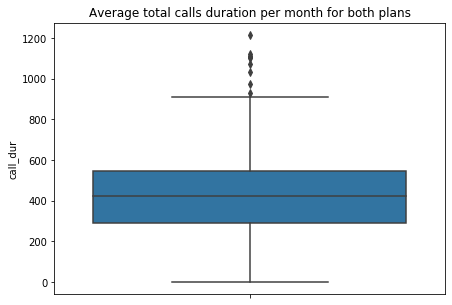

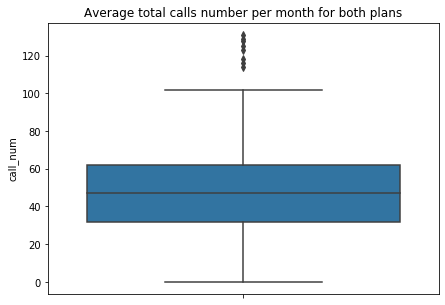

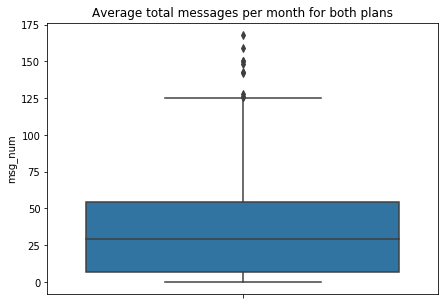

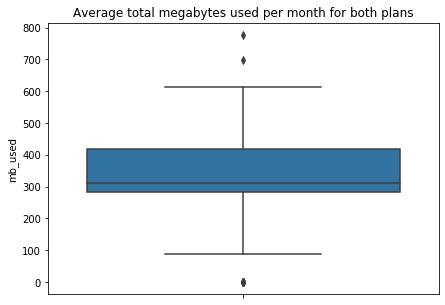

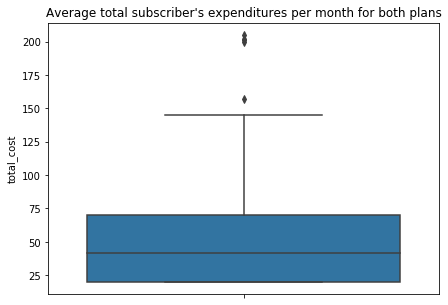

In [70]:
plt.figure(figsize=(7, 5))
plt.title('Average total calls duration per month for both plans')
sns.boxplot(y="call_dur", data=megaline)
plt.figure(figsize=(7, 5))
plt.title('Average total calls number per month for both plans')
sns.boxplot(y="call_num", data=megaline)
plt.figure(figsize=(7, 5))
plt.title('Average total messages per month for both plans')
sns.boxplot(y="msg_num", data=megaline)
plt.figure(figsize=(7, 5))
plt.title('Average total megabytes used per month for both plans')
sns.boxplot(y="mb_used", data=megaline)
plt.figure(figsize=(7, 5))
plt.title("Average total subscriber's expenditures per month for both plans")
sns.boxplot(y="total_cost", data=megaline);

Just some outliers. All legit meaningful values.

In [71]:
len(megaline.query('call_dur > 900'))

11

In [72]:
len(megaline.query('call_num > 700'))

0

In [73]:
megaline.query('call_dur > 900')

,user_id,first_name,last_name,age,city,reg_date,plan,mb_used,gb_charged,msg_num,call_num,call_dur,stopped,total_cost
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,474,1,50,118,1104,0,201
57,1057,Theo,Sargent,18,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-08-07,ultimate,525,1,121,128,1072,0,70
118,1118,Deane,Ramirez,28,"Columbus, OH MSA",2018-12-08,surf,489,1,17,92,909,0,142
126,1126,Jermaine,Mcguire,68,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-02,ultimate,499,1,78,95,905,0,70
240,1240,Drema,Lopez,61,"Baton Rouge, LA MSA",2018-03-18,surf,489,1,11,125,1119,0,205
324,1324,Romana,Moore,18,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,surf,533,1,124,114,1033,0,202
326,1326,Johnathon,Branch,21,"Greensboro-High Point, NC MSA",2018-02-06,surf,498,1,78,102,929,0,157
329,1329,Doyle,Nunez,65,"Charleston-North Charleston, SC MSA",2018-08-25,ultimate,458,1,91,131,1215,0,70
365,1365,Milford,Rush,19,"Grand Rapids-Kentwood, MI MSA",2018-02-09,surf,578,1,45,123,1102,0,200
382,1382,Luci,Kidd,49,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-06-22,ultimate,472,1,52,129,1111,0,70


In [74]:
megaline.query('call_num > 700')

,user_id,first_name,last_name,age,city,reg_date,plan,mb_used,gb_charged,msg_num,call_num,call_dur,stopped,total_cost


Guess there is an obvious correlation between calls frequency and duration. We'll get back to it later.

In [75]:
megaline.query('plan == "surf"')['call_dur'].median()

416.0

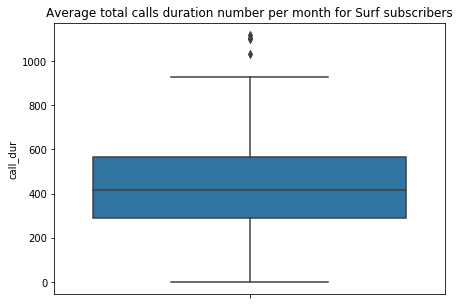

In [76]:
plt.figure(figsize=(7, 5))
plt.title('Average total calls duration number per month for Surf subscribers')
sns.boxplot(y='call_dur', data=megaline.query('plan == "surf"'));

In [77]:
np.quantile(megaline.query('plan == "surf"')['call_dur'], .90)

694.2

In [78]:
megaline.query('plan == "surf"')['call_dur'].max()

1119

416 minutes is the median time spent talking for surf subscribers. 694 minutes is enough for 90% of subscribers. And 1200 minutes would exceed needs for all. What number of minutes should be proposed is question for very different kind of research. 

In [79]:
megaline.query('plan == "ultimate"')['call_dur'].median()

421.0

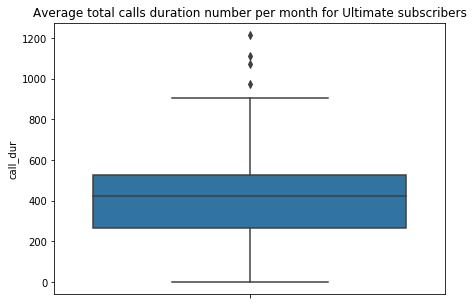

In [80]:
plt.figure(figsize=(7, 5))
plt.title('Average total calls duration number per month for Ultimate subscribers')
sns.boxplot(y='call_dur', data=megaline.query('plan == "ultimate"'));

In [81]:
np.quantile(megaline.query('plan == "ultimate"')['call_dur'], .90)

663.0

In [82]:
megaline.query('plan == "ultimate"')['call_dur'].max()

1215

421 minutes is the median time spent talking for Ultimate subscribers. 663 minutes is enough for 90% of subscribers. And 1300 minutes would exceed needs for all. 

In [83]:
megaline.query('plan == "surf"')['mb_used'].median()

311.0

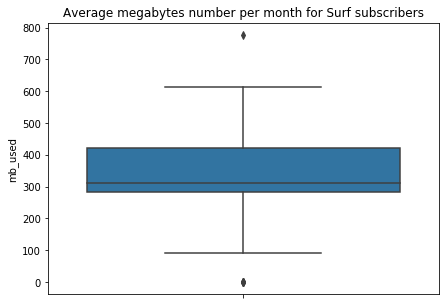

In [84]:
plt.figure(figsize=(7, 5))
plt.title('Average megabytes number per month for Surf subscribers')
sns.boxplot(y='mb_used', data=megaline.query('plan == "surf"'));

In [85]:
np.quantile(megaline.query('plan == "surf"')['mb_used'], .90)

510.0

In [86]:
megaline.query('plan == "surf"')['mb_used'].max()

777

778mb per month maximally in 2018, rly?

345MB is median data volume for surfers. 511MB would be enough for 90%. 800 would exceed demand.

In [87]:
megaline.query('plan == "ultimate"')['mb_used'].median()

308.0

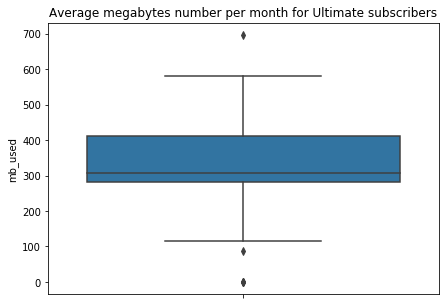

In [88]:
plt.figure(figsize=(7, 5))
plt.title('Average megabytes number per month for Ultimate subscribers')
sns.boxplot(y='mb_used', data=megaline.query('plan == "ultimate"'));

In [89]:
np.quantile(megaline.query('plan == "ultimate"')['mb_used'], .90)

499.0

In [90]:
megaline.query('plan == "ultimate"')['mb_used'].max()

697

339MB is median data volume for ultimate. 500MB would be enough for 90%. 700 would exceed demand.

In [91]:
megaline.query('plan == "surf"')['msg_num'].median()

28.0

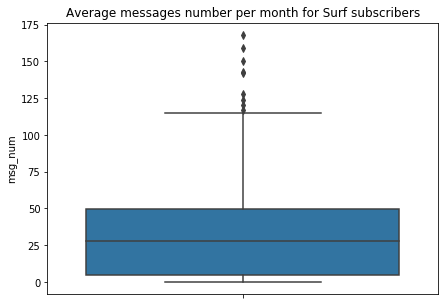

In [92]:
plt.figure(figsize=(7, 5))
plt.title('Average messages number per month for Surf subscribers')
sns.boxplot(y='msg_num', data=megaline.query('plan == "surf"'));

In [93]:
np.quantile(megaline.query('plan == "surf"')['msg_num'], .90)

78.0

In [94]:
megaline.query('plan == ""')['msg_num'].max()

nan

33 SMS monthly in average for surf users. 78 messages would satisfy 90%. 170 would exceed needs. 

In [95]:
megaline.query('plan == "ultimate"')['msg_num'].median()

34.0

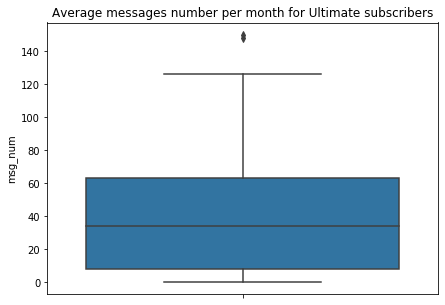

In [96]:
plt.figure(figsize=(7, 5))
plt.title('Average messages number per month for Ultimate subscribers')
sns.boxplot(y='msg_num', data=megaline.query('plan == "ultimate"'));

In [97]:
np.quantile(megaline.query('plan == "ultimate"')['msg_num'], .90)

83.0

In [98]:
megaline.query('plan == "ultimate"')['msg_num'].max()

150

39 SMS monthly in average for ultimate. 83 messages would satisfy 90%. 150 would exceed needs for most. 

In [99]:
megaline.query('plan == "surf"').drop(['user_id', 'stopped'], axis=1).describe()

,age,mb_used,gb_charged,msg_num,call_num,call_dur,total_cost
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,44.952802,343.914454,0.979351,33.348083,47.336283,421.938053,37.755162
std,17.132208,110.205275,0.142416,32.705017,24.088450,217.360359,33.235162
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,29.000000,284.000000,1.000000,5.000000,32.000000,291.000000,20.000000
50%,45.000000,311.000000,1.000000,28.000000,47.000000,416.000000,20.000000
75%,61.000000,420.500000,1.000000,49.500000,63.500000,566.000000,43.000000
max,75.000000,777.000000,1.000000,168.000000,125.000000,1119.000000,205.000000


In [100]:
megaline.query('plan == "surf"').drop(['user_id', 'stopped'], axis=1).var()

age             293.512559
mb_used       12145.202719
gb_charged        0.020282
msg_num        1069.618125
call_num        580.253443
call_dur      47245.525737
total_cost     1104.575972
dtype: float64

For Surf users medians are: age 45, traffic usage 285, messages 28, minutes 416, number of calls 172, total cost is 20.
Standard deviations are: 17 for age, 110 for megabytes, 35 messages, 217 minutes, 193 calls, and 33 for total cost.
Variances are shown above.

In [101]:
megaline.query('plan == "ultimate"').drop(['user_id', 'stopped'], axis=1).describe()

,age,mb_used,gb_charged,msg_num,call_num,call_dur,total_cost
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.0
mean,46.608696,337.664596,0.975155,39.316770,47.043478,415.254658,70.0
std,16.627227,112.513552,0.156137,35.274534,24.733416,220.122218,0.0
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.0
25%,33.000000,283.000000,1.000000,8.000000,31.000000,263.000000,70.0
50%,48.000000,308.000000,1.000000,34.000000,48.000000,421.000000,70.0
75%,60.000000,411.000000,1.000000,63.000000,60.000000,526.000000,70.0
max,75.000000,697.000000,1.000000,150.000000,131.000000,1215.000000,70.0


In [102]:
megaline.query('plan == "ultimate"')['age'].var()

276.4646739130435

In [103]:
16.627227*16.627227

276.46467770952904

In [104]:
megaline.query('plan == "ultimate"').drop(['user_id', 'stopped'], axis=1).var()

age             276.464674
mb_used       12659.299301
gb_charged        0.024379
msg_num        1244.292780
call_num        611.741848
call_dur      48453.790994
total_cost        0.000000
dtype: float64

For Ultimate users medians are: age 48, traffic usage 309, messages 34, minutes 421, number of calls 156, total cost 70
Standard deviations are: 17 for age, 113 for megabytes, 35 messages, 220 minutes, 192 calls, and total cost is invariable with 0. Google points to sexually transmitted disease first, when I look for std definitions.

Variances are shown above.
Variance is standard deviation squared, found that they are not exactly equal because describe() method returns the corrected sample standard deviation.
    
Total cost looks strange. Rechecked calculation logic. It's just because not a single person broke ultimate plan limitations.

In [105]:
megaline.query('plan == "ultimate"')['total_cost'].value_counts()

70    161
Name: total_cost, dtype: int64

In [106]:
len(megaline.query('plan == "ultimate" & call_dur > 3000')), len(megaline.query('plan == "ultimate" & msg_num > 1000')), len(megaline.query('plan == "ultimate" & mb_used > 30720'))

(0, 0, 0)

No one exceeds limits in Ultimate tariff plan. Not a single person spends more than 30GB. Unbelievable. Maybe it's because it's median age is pretty high.

In [107]:
megaline.query('plan == "surf"').drop(['user_id', 'stopped'], axis=1).describe()

,age,mb_used,gb_charged,msg_num,call_num,call_dur,total_cost
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,44.952802,343.914454,0.979351,33.348083,47.336283,421.938053,37.755162
std,17.132208,110.205275,0.142416,32.705017,24.088450,217.360359,33.235162
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,29.000000,284.000000,1.000000,5.000000,32.000000,291.000000,20.000000
50%,45.000000,311.000000,1.000000,28.000000,47.000000,416.000000,20.000000
75%,61.000000,420.500000,1.000000,49.500000,63.500000,566.000000,43.000000
max,75.000000,777.000000,1.000000,168.000000,125.000000,1119.000000,205.000000


In [108]:
megaline.query('plan == "surf"').var()

user_id       20010.132534
age             293.512559
mb_used       12145.202719
gb_charged        0.020282
msg_num        1069.618125
call_num        580.253443
call_dur      47245.525737
stopped           0.063431
total_cost     1104.575972
dtype: float64

Surf audience is just slightly younger with the median age of 45. Total expenditures are far more versatile.

In [109]:
megaline.query('plan == "surf"')['total_cost'].value_counts()

20     178
22       8
23       8
21       7
25       7
      ... 
95       1
49       1
97       1
101      1
205      1
Name: total_cost, Length: 74, dtype: int64

In [110]:
len(megaline.query('plan == "surf" & call_dur > 500')), len(megaline.query('plan == "surf" & msg_num > 50')), len(megaline.query('plan == "surf" & mb_used > 15360'))

(120, 82, 0)

a lot of surfers exceeded modest limitations of the plan

In [111]:
megaline.query('plan == "ultimate"').drop(['user_id', 'stopped'], axis=1).corr()

,age,mb_used,gb_charged,msg_num,call_num,call_dur,total_cost
age,1.000000,0.055254,0.049195,0.040749,0.013963,0.012001,NaN
mb_used,0.055254,1.000000,0.480523,0.413042,0.247895,0.254938,NaN
gb_charged,0.049195,0.480523,1.000000,0.178464,0.304543,0.302053,NaN
msg_num,0.040749,0.413042,0.178464,1.000000,0.174082,0.169794,NaN
call_num,0.013963,0.247895,0.304543,0.174082,1.000000,0.991340,NaN
call_dur,0.012001,0.254938,0.302053,0.169794,0.991340,1.000000,NaN
total_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No correlations fur total cost here, it's invariable, just 70

In [112]:
megaline.query('plan == "surf"').drop(['user_id', 'stopped'], axis=1).corr()

,age,mb_used,gb_charged,msg_num,call_num,call_dur,total_cost
age,1.000000,0.061010,-0.001613,0.032672,0.006763,0.005846,-0.008189
mb_used,0.061010,1.000000,0.453805,0.264225,0.290226,0.294792,0.370427
gb_charged,-0.001613,0.453805,1.000000,0.057445,0.233156,0.230294,0.052059
msg_num,0.032672,0.264225,0.057445,1.000000,0.205145,0.215931,0.302312
call_num,0.006763,0.290226,0.233156,0.205145,1.000000,0.991299,0.767787
call_dur,0.005846,0.294792,0.230294,0.215931,0.991299,1.000000,0.787420
total_cost,-0.008189,0.370427,0.052059,0.302312,0.767787,0.787420,1.000000


In [113]:
megaline.drop(['user_id', 'stopped'], axis=1).corr()

,age,mb_used,gb_charged,msg_num,call_num,call_dur,total_cost
age,1.000000,0.057871,0.014753,0.038933,0.008801,0.007136,0.016075
mb_used,0.057871,1.000000,0.462943,0.311726,0.276234,0.281945,0.252625
gb_charged,0.014753,0.462943,1.000000,0.099406,0.257895,0.254977,0.029940
msg_num,0.038933,0.311726,0.099406,1.000000,0.193267,0.198216,0.251938
call_num,0.008801,0.276234,0.257895,0.193267,1.000000,0.991255,0.546420
call_dur,0.007136,0.281945,0.254977,0.198216,0.991255,1.000000,0.558784
total_cost,0.016075,0.252625,0.029940,0.251938,0.546420,0.558784,1.000000


surprisingly, no significant correlations between age and behavior here
the only somewhat strong is calls duration and calls number correlation.
calls duration and total cost positive dependence is noticeable. 

In [114]:
megaline.query('plan == "ultimate"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 497
Data columns (total 14 columns):
user_id       161 non-null int64
first_name    161 non-null object
last_name     161 non-null object
age           161 non-null int64
city          161 non-null object
reg_date      161 non-null object
plan          161 non-null object
mb_used       161 non-null int64
gb_charged    161 non-null int64
msg_num       161 non-null int64
call_num      161 non-null int64
call_dur      161 non-null int64
stopped       161 non-null int64
total_cost    161 non-null int64
dtypes: int64(9), object(5)
memory usage: 18.9+ KB


values rounded up to gigabytes are almost invariable for both plans

In [115]:
megaline.query('plan == "ultimate"')["gb_charged"].value_counts()

1    157
0      4
Name: gb_charged, dtype: int64

In [116]:
megaline.query('plan == "surf"')["gb_charged"].value_counts()

1    332
0      7
Name: gb_charged, dtype: int64

In [117]:
megaline['stopped'].value_counts()

0    466
1     34
Name: stopped, dtype: int64

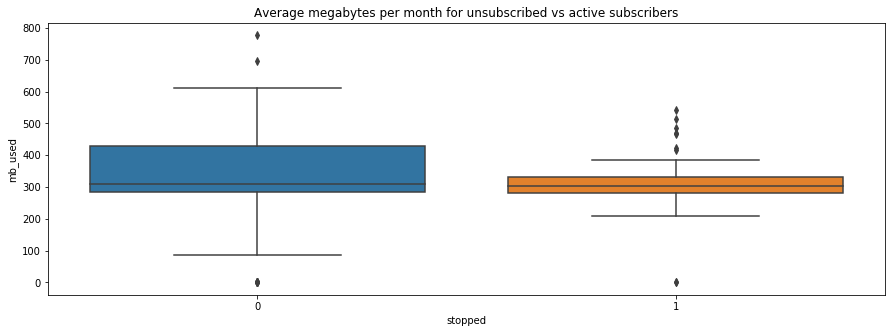

In [118]:
plt.figure(figsize=(15, 5))
plt.title('Average megabytes per month for unsubscribed vs active subscribers')
sns.boxplot( x=megaline['stopped'], y=megaline['mb_used']);

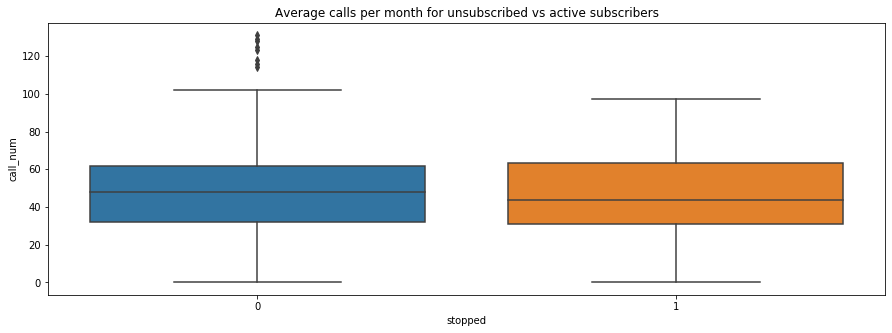

In [119]:
plt.figure(figsize=(15, 5))
plt.title('Average calls per month for unsubscribed vs active subscribers')
sns.boxplot( x=megaline['stopped'], y=megaline['call_num']);

Statistically insignificant presence of those who unsubscribed from the plan in the given period still might be peculiar to look at

In [120]:
def treatoutliers():
    
    df = megaline
    columns=['mb_used', 'msg_num', 'call_dur', 'call_num', 'total_cost']
    factor=1.5
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        ceil = Q3 + factor * IQR
        df = df[df[column] <= ceil]
         
    return df

megaline_outliers_filtred = treatoutliers()

In [121]:
megaline_outliers_filtred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 0 to 499
Data columns (total 14 columns):
user_id       479 non-null int64
first_name    479 non-null object
last_name     479 non-null object
age           479 non-null int64
city          479 non-null object
reg_date      479 non-null object
plan          479 non-null object
mb_used       479 non-null int64
gb_charged    479 non-null int64
msg_num       479 non-null int64
call_num      479 non-null int64
call_dur      479 non-null int64
stopped       479 non-null int64
total_cost    479 non-null int64
dtypes: int64(9), object(5)
memory usage: 56.1+ KB


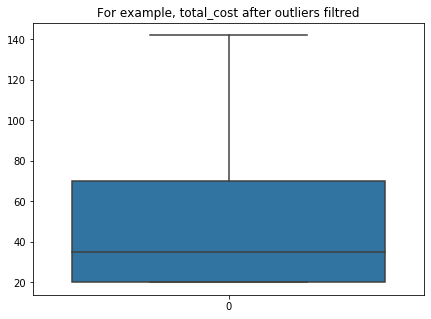

In [122]:
plt.figure(figsize=(7, 5))
plt.title('For example, total_cost after outliers filtred')
sns.boxplot(data=megaline_outliers_filtred['total_cost']);

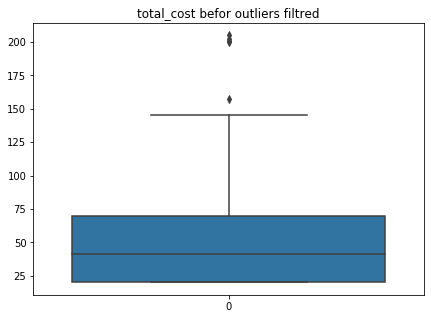

In [123]:
plt.figure(figsize=(7, 5))
plt.title('total_cost before outliers filtred')
sns.boxplot(data=megaline['total_cost']);

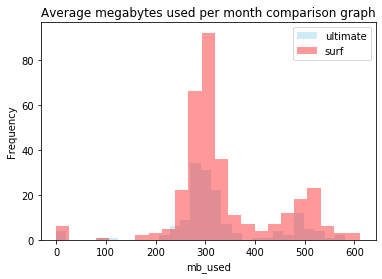

In [124]:
sns.distplot( megaline_outliers_filtred.query('plan == "ultimate"')["mb_used"], color="skyblue", kde=False)
sns.distplot( megaline_outliers_filtred.query('plan == "surf"')["mb_used"] , color="red", kde=False)
plt.title('Average megabytes used per month comparison graph')
plt.legend(['ultimate', 'surf'])
plt.ylabel('Frequency', fontsize=10);

OK. This distribution looks not so far from normal, but with the second peak. Now y-axis depicts actual frequency of x-axis values in the dataset. Blue is for Ultimate, red is for Surf. So here we see that surf users are more active internet users, though they pay much less.

I won't plot gb_charges, since values rounded up to gigabytes are almost invariable for both plans

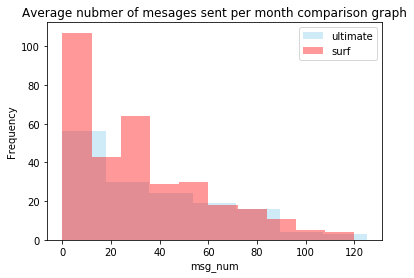

In [125]:
sns.distplot( megaline_outliers_filtred.query('plan == "ultimate"')["msg_num"] , color="skyblue", label="Ultimate", kde=False)
sns.distplot( megaline_outliers_filtred.query('plan == "surf"')["msg_num"] , color="red", label="Surf", kde=False)
plt.title('Average nubmer of mesages sent per month comparison graph')
plt.legend(['ultimate', 'surf'])
plt.ylabel('Frequency', fontsize=10);

Surfers are slightly more active here. Most subscribers of both plans send verly little or no messages, unsurprisingly.

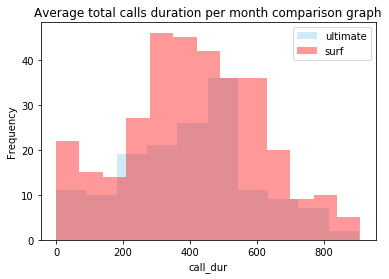

In [126]:
sns.distplot( megaline_outliers_filtred.query('plan == "ultimate"')["call_dur"] , color="skyblue", label="Ultimate", kde=False)
sns.distplot( megaline_outliers_filtred.query('plan == "surf"')["call_dur"] , color="red", label="Surf", kde=False)
plt.title('Average total calls duration per month comparison graph')
plt.legend(['ultimate', 'surf'])
plt.ylabel('Frequency', fontsize=10);

Again, surf users are noticeable more active. Slight near-zero peak is guessable, some people might not like to talk at all, and some of those probably prefer to expend internet traffic rather than minutes.  

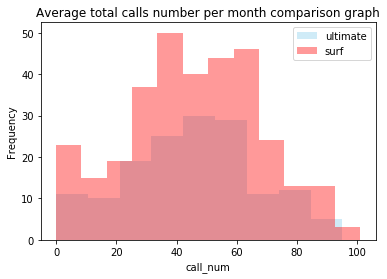

In [127]:
sns.distplot( megaline_outliers_filtred.query('plan == "ultimate"')["call_num"] , color="skyblue", label="Ultimate", kde=False)
sns.distplot( megaline_outliers_filtred.query('plan == "surf"')["call_num"] , color="red", label="Surf", kde=False)
plt.title('Average total calls number per month comparison graph')
plt.legend(['ultimate', 'surf'])
plt.ylabel('Frequency', fontsize=10);

And here, surfers are the most active. Most likely, some subscribers already know that surf let's thaem pay less for more. 

In [128]:
megaline.query('plan == "ultimate"')["total_cost"].value_counts()

70    161
Name: total_cost, dtype: int64

In [129]:
megaline.query('plan == "surf"')["total_cost"].median()

20.0

Average of 20 vs average of 70. there are some differences between plans in how much subscribers use services, looks like ultimate users use megaline services significantly less comparing to surf subscribers. But the average expenditures are more than 3 fold different, surf is more than 3 times cheaper. Now it's obvious, <code style="background:yellow;color:black">the Ultimate is far more profitable.</code> To say exactly how much more profitable I need more info to calculate margins, but it may be several times more profitable. 

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


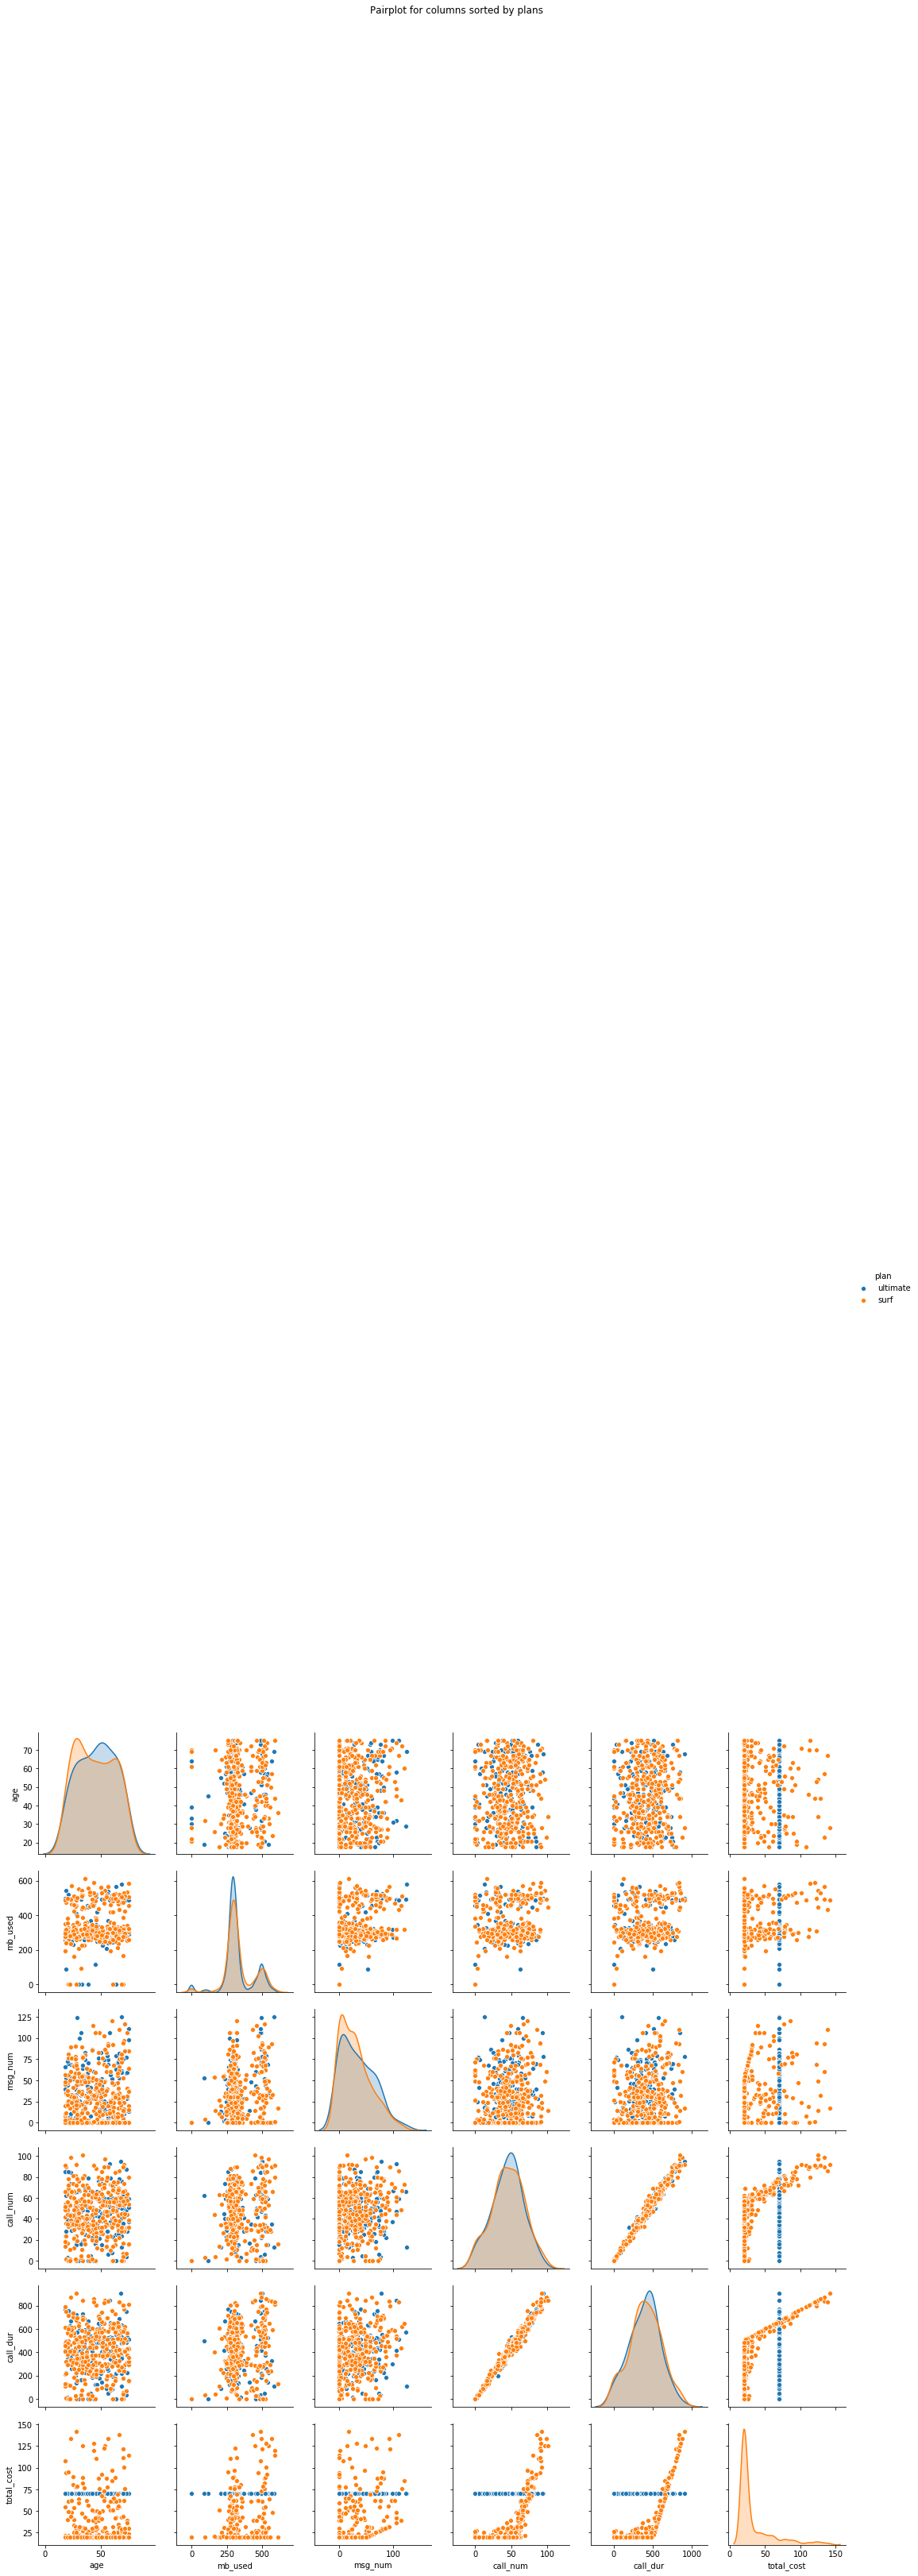

In [130]:
pairplot1 = sns.pairplot(megaline_outliers_filtred.drop(['user_id', 'stopped', 'gb_charged'], axis = 1), hue ='plan')
pairplot1.fig.suptitle("Pairplot for columns sorted by plans", y=3);

On the calls duration against costs graph I see exactly the moment when users exceed surf plan limits and price goes up. Costs for ultimate users look like a straight line of dot's because it's invariable. Here it's easy to see that surf users are somewhat younger. Not like with this level of zoom difference between resouces spent by different plans look that significant, not at all, Ultimate users look more active on this zoom level, comparing to graphs above, but still, this do not change our conclusion. 

In [131]:
megaline.query('plan == "surf"').var()

user_id       20010.132534
age             293.512559
mb_used       12145.202719
gb_charged        0.020282
msg_num        1069.618125
call_num        580.253443
call_dur      47245.525737
stopped           0.063431
total_cost     1104.575972
dtype: float64

In [132]:
megaline.query('plan == "ultimate"').var()

user_id       22757.502174
age             276.464674
mb_used       12659.299301
gb_charged        0.024379
msg_num        1244.292780
call_num        611.741848
call_dur      48453.790994
stopped           0.064053
total_cost        0.000000
dtype: float64

Call duraton histogram shows distribution closest to normal. All are somewhat skewed. Dispersion shown as a lists of variances. Some outliers are present, but that's all legit meaningful values.

For Ultimate users medians are: age 48, traffic usage 309, messages 34, minutes 421, number of calls 156, total cost 70
Standard deviations are: 17 for age, 113 for megabytes, 35 messages, 220 minutes, 192 calls, and total cost is invariable with 0. 

For Surf users medians are: age 45, traffic usage 285, messages 28, minutes 416, number of calls 172, total cost is 20.
Standard deviations are: 17 for age, 110 for megabytes, 35 messages, 217 minutes, 193 calls, and 33 for total cost.
Variances are shown above.

So Surf users are slightly younger, they are exceeding modest plan limitations frequently, whilst, surprisingly, Ultimate users never exceed their plan limitations in our list, not a single person did not spend a single megabyte over the threshhold. 

Total expenditures vary drastically between plans. An average of 20 vs average of 70. There are significant differences in how much subscribers use services, Surfers use noticeably more, as shown on histograms. But the average expenditures are more than 3-fold different, Ultimate costs 3.5 times more in average. So it's now obvious, the Ultimate is far more profitable. To say exactly how much more profitable I need more info to calculate margins, but it might ,ost likely be over 3 times more profitable, probably even more than 5 times more profitable in terms of pure revenues. 


What number of minutes should be proposed is a question for a very different kind of research, here I'm just listing median, 0.9 quantile, and highest outlier value rounded up to the next hundred.
<br>416 minutes is the median time spent talking for Surf subscribers. 694 minutes is enough for 90% of subscribers. 1200 minutes would exceed needs for all. 
<br>421 minutes is the median time spent talking for Ultimate subscribers. 663 minutes is enough for 90% of subscribers. 1300 minutes would exceed needs for all. 
<br>345MB is median data volume for Surfers. 511MB would be enough for 90%. 800 would exceed demand.
<br>339MB is median data volume for Ultimate. 500MB would be enough for 90%. 700 would exceed demand.
<br>33 SMS monthly in average for Surf users. 78 messages would satisfy 90%. 200 would exceed needs. 
<br>39 SMS monthly in average for Ultimate. 83 messages would satisfy 90%. 200 would exceed needs. 
 

### Step 4. Test the hypotheses

    The average profit from users of Ultimate and Surf calling plans differs.
    
    The average profit from users in NY-NJ area is different from that of the users from other regions.

In [133]:
np.var(megaline.query('plan == "ultimate"')["total_cost"])

0.0

In [134]:
np.var(megaline.query('plan == "surf"')["total_cost"])

1101.3176355931464

I know that the variance for ultimate is zero, all the values are 70. Curious if this testing method can actually work as supposed with this. Let's set equal_var to false.

Here the null hypothesis is that the avg profits of ultimate and surf are equal. Alternative is that they are NOT equal. 

In [135]:
from scipy import stats as st
import numpy as np

alpha =  0.05 

results = st.ttest_ind(
        megaline.query('plan == "surf"')["total_cost"], 
        megaline.query('plan == "ultimate"')["total_cost"],
        equal_var = False
        ) 

print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print("reject the null hypothesis")
else:
    print("can't reject the null hypothesis")

p-value: 1.0001481103222582e-50
reject the null hypothesis


In [1]:
1.0001481103222582e-50 < 0.05

True

Null hypothesis rejected. Because they are not equal, as we already know from the sections above. 

In [136]:
 megaline.query('plan == "surf"')["total_cost"].median()

20.0

In [137]:
 megaline.query('plan == "ultimate"')["total_cost"].median()

70.0

NY-NJ area

In [138]:
ny_nj = megaline[megaline['city'].str.contains('NY') | megaline['city'].str.contains('NJ')]

In [139]:
other = megaline[megaline['city'].str.contains('NY') | megaline['city'].str.contains('NJ') == False]

In [140]:
np.var(ny_nj["total_cost"])

726.7710434536718

In [141]:
np.var(other["total_cost"])

1030.250797860528

setting equal_var to false. no idea why equal_var is not assigned automatically by the ttest method

Here the null hypothesis is that the average profits for users in NY-NJ area are equal to that of the users from other regions. Alternative is that they are not equal. 

In [2]:
from scipy import stats as st
import numpy as np

alpha =  0.05

results = st.ttest_ind(
        ny_nj["total_cost"], 
        other["total_cost"],
        equal_var = False) 

print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print("reject the null hypothesis")
else:
    print("can't reject the null hypothesis")

NameError: name 'ny_nj' is not defined

OK. But I would still reject it. As if the alpha value was set to 0.055
</p>
5.4% is not a great deal of likelihood of NY-NJ area profits being higher in comparison to other regions combined. Most likely they are not equal. 

In [143]:
print (ny_nj["total_cost"].median(), '!=', other["total_cost"].median())

30.0 != 47.0


and here in our data set they are nothing like equal, though it doesn't 

### Conclusions

The Ultimate plan is far more profitable for the company, Ultimate users use slightly less resources and pay 350% more than Surf subscribers in average. To say exactly how much more profitable is Ultimate I need more info to calculate margins, but most likely it's average margins are more than 3 times higher than those for surf plan. I would request margins calculation formula, to give precise value of how many times more profitable. 
It was shown that the average profit from users of Ultimate and Surf calling plans differs, and the average expenditures for users in NY-NJ area is different from that of users from other regions.